## Recreating figure 3.7 from Bishop's "Pattern Recognition and Machine Learning."

This notebook provides scaffolding for your exploration Bayesian Linear Gaussian Regression, as described in Lecture.
In particular, through this notebook you will reproduce several variants of figure 3.7 from Bishop's book.

## Instructions:

### 5.1-3:

Implement the functions in `problem` -- completed implementations of these functions are needed to generate the plots.

In [6]:
from support_code import *
from problem_solutions_py3 import *

## Instructions (continued):

### 5.4:

If your implementations are correct, then the next few code blocks in this notebook will generate the required variants of Bishop's figure. These are the same figures that you would obtain if you ran `python problem.py` from the command line -- this notebook is just provided as additional support.

In [7]:
# Generate our simulated dataset
# Note we are using sigma == 0.2

np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
data_size = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = generate_data(data_size,
                               noise,
                               actual_weights)

Next, we generate the plots using 3 different prior covariance matrix. In the main call to `problem.py`, this is done in a loop -- here we wrap the loop body in a short helper function.

In [8]:
def make_plot_given_sigma(sigma_squared):
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    make_plots(actual_weights,
               xtrain,
               ytrain,
               likelihood_var,
               prior,
               likelihood_func,
               get_posterior_params,
               get_predictive_params)

In [9]:
sigmas = [1/2, 1/(2**5), 1/(2**10)]

#### First covariance matrix:
$$\Sigma_{0} = \frac{1}{2}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

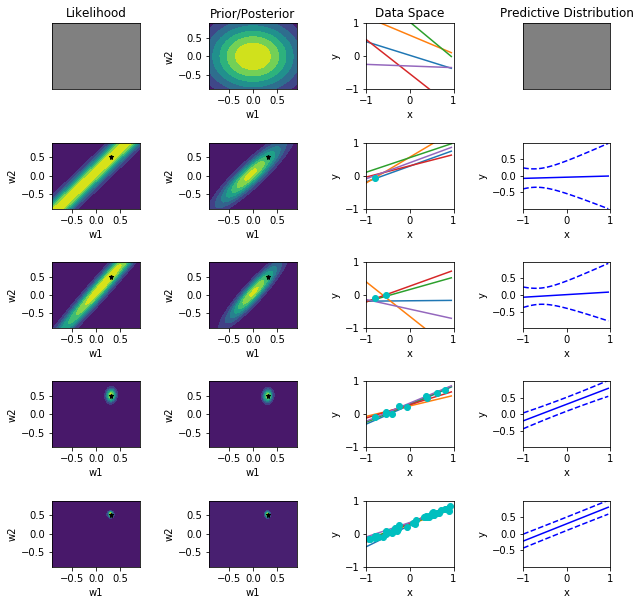

In [10]:
make_plot_given_sigma(sigmas[0])

#### Second covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{5}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

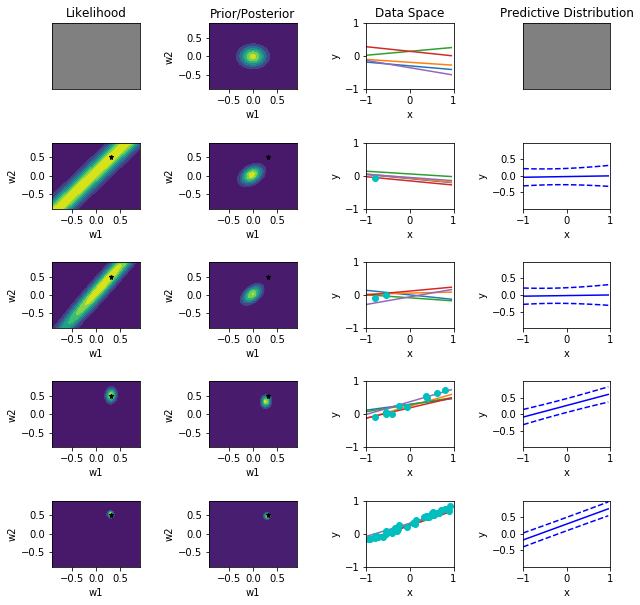

In [11]:
make_plot_given_sigma(sigmas[1])

#### Third covariance matrix:
$$\Sigma_{0} = \frac{1}{2^{10}}I,\qquad{} I \in \mathbb{R}^{2 \times 2}$$

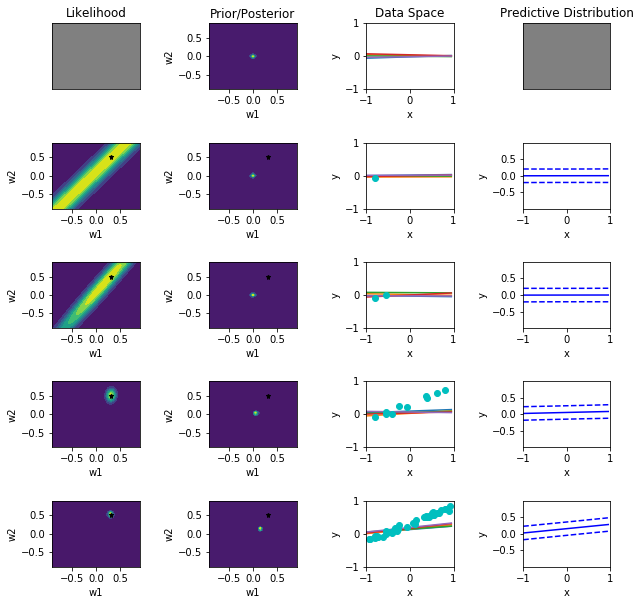

In [12]:
make_plot_given_sigma(sigmas[2])

## Instructions (continued):

### 5.5:

For questiion (5) (Comment on your results ...) no code is required -- instead please answer with a written description.

## Instructions (continued):

### 5.6:

For question (6), find the MAP solution for the first prior covariance $\left(\frac{1}{2}I\right)$ by completing the implementation below. In addition, be sure to justify the value for the regularization coefficient (in `sklearn` named `alpha`) in your written work.

In [13]:
from sklearn.linear_model import Ridge

### Solution

Recall (from the problem setup) $\sigma^2=0.04$), and $\Sigma_0 = \frac{\sigma^2}{\lambda}I = \frac{1}{2}I$.

Substitution yields
$$
2 * 0.04I = 0.08 I = \lambda I
$$

So we'll take $\lambda=0.08$.

In [14]:
alpha = 0.08 # Change to the correct value
ridge = Ridge(alpha=alpha,
              fit_intercept=False,
              solver='cholesky')

ridge.fit(xtrain, ytrain)

Ridge(alpha=0.08, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

If alpha is set correctly, ridge.coef_ will equal the prior mean/MAP estimate returned by the next two cells.

In [15]:
ridge.coef_

array([[ 0.30052135,  0.52406189]])

In [16]:
prior = {"mean":np.matrix([[0], [0]]),
         "var":matlib.eye(2) * sigmas[0]}

post = get_posterior_params(xtrain, ytrain, prior,
                            likelihood_var = 0.2**2)

post[0].ravel()

matrix([[ 0.30052135,  0.52406189]])